Image acquired successfully!
Original image shape: (850, 1332, 3)
Image converted to grayscale successfully!
Grayscale image shape: (850, 1332)


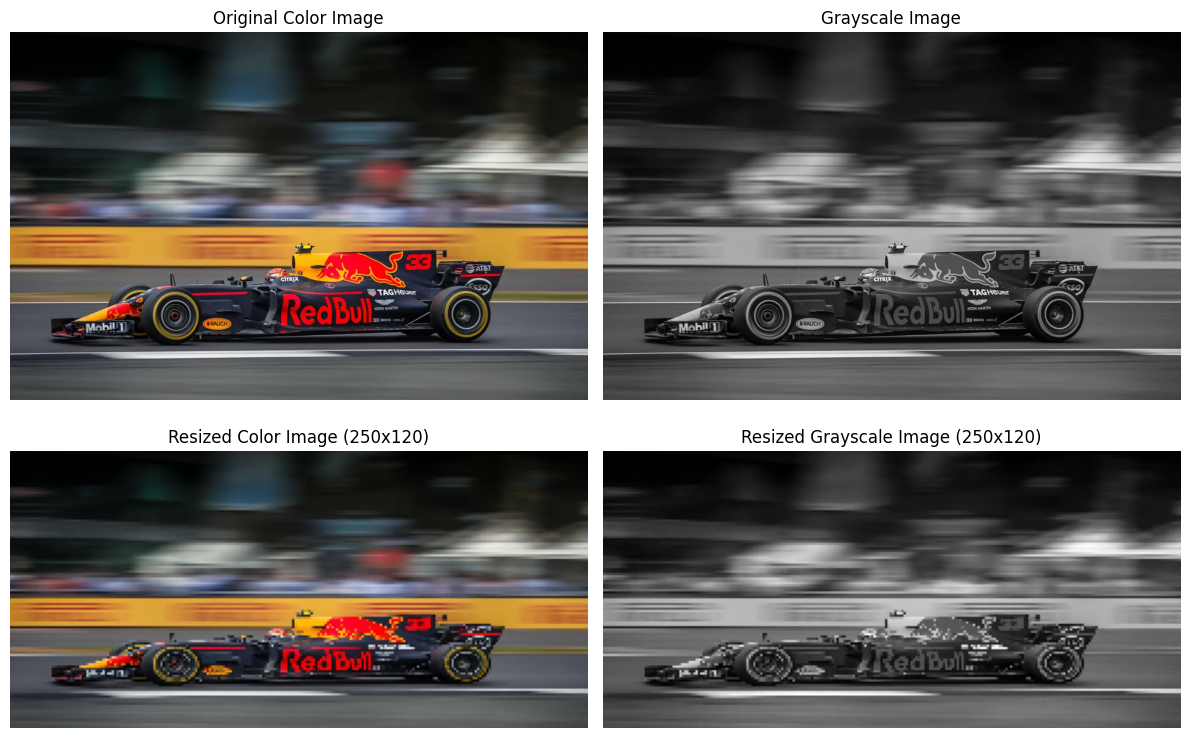

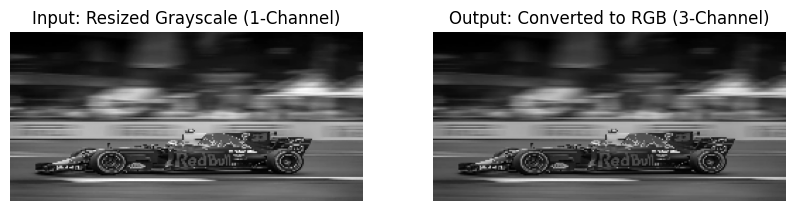

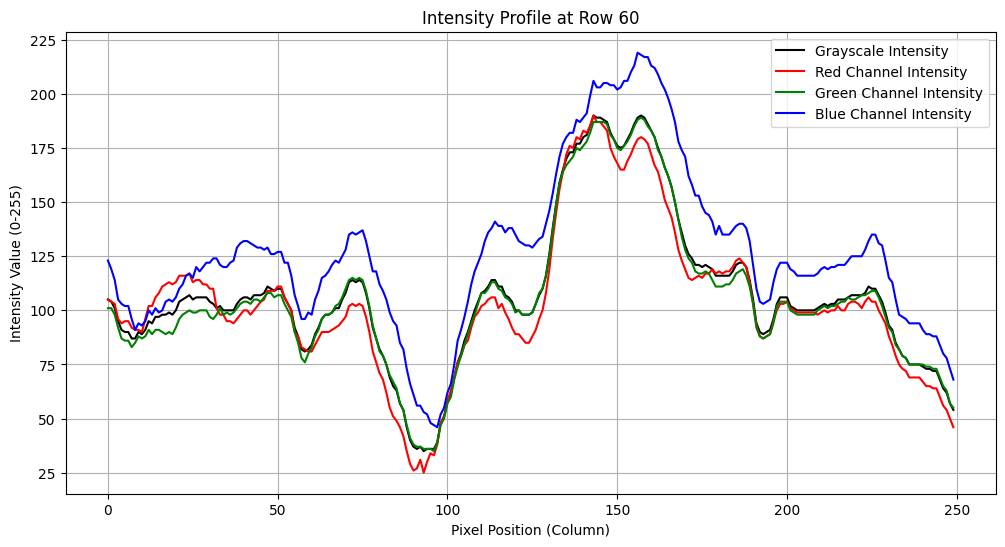

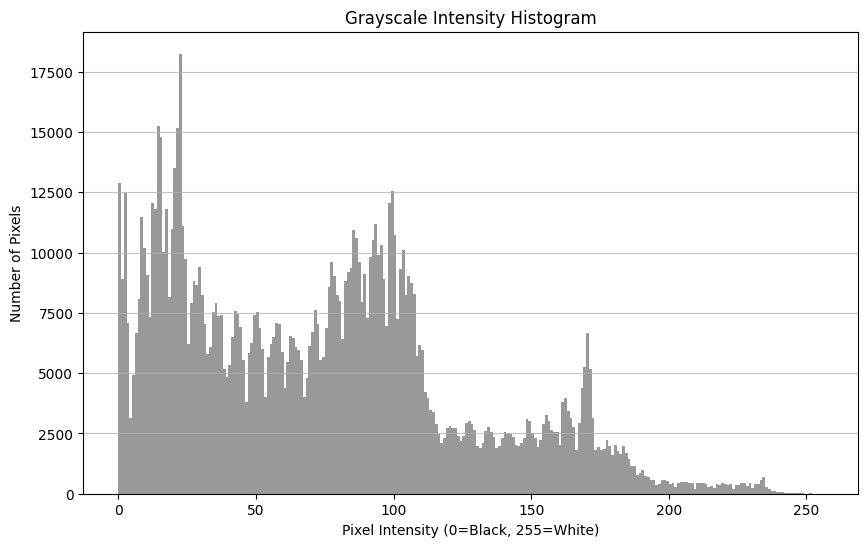

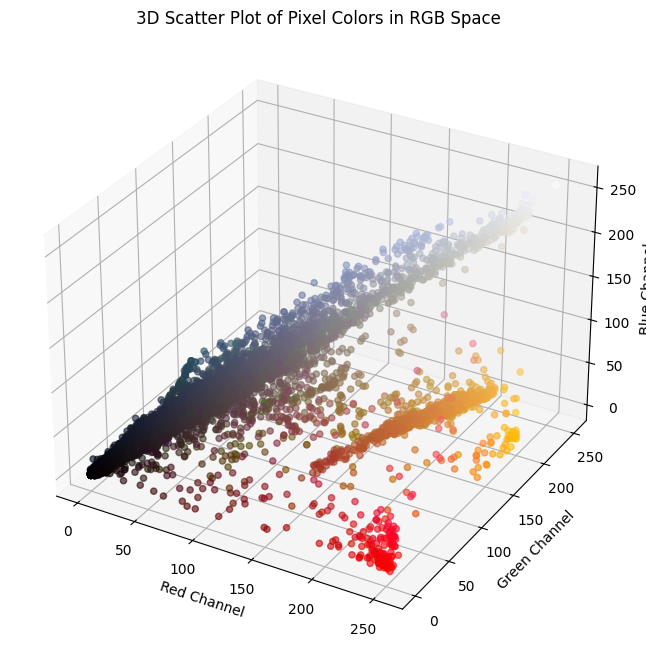

In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# --- Step 1: Image Acquisition ---
try:
    img_path = "/content/OIP.png"
    og_img = cv2.imread(img_path)

    if og_img is None:
        raise FileNotFoundError(f"Image not found at {img_path}")

    og_img_rgb = cv2.cvtColor(og_img, cv2.COLOR_BGR2RGB)

    print("Image acquired successfully!")
    print("Original image shape:", og_img_rgb.shape)

except Exception as e:
    print(f"Error loading image: {e}")
    og_img_rgb = None

# --- Step 2: Grayscale Conversion ---
if og_img_rgb is not None:
    grayscale_img = cv2.cvtColor(og_img, cv2.COLOR_BGR2GRAY)
    print("Image converted to grayscale successfully!")
    print("Grayscale image shape:", grayscale_img.shape)

    # --- Step 3: Image Sampling (Resizing) ---
    new_size = (250, 120)
    resized_color_img = cv2.resize(og_img_rgb, new_size)
    resized_grayscale_img = cv2.resize(grayscale_img, new_size)

    # Display original and resized images
    plt.figure(figsize=(12, 8))
    plt.subplot(2, 2, 1)
    plt.imshow(og_img_rgb)
    plt.title('Original Color Image')
    plt.axis('off')

    plt.subplot(2, 2, 2)
    plt.imshow(grayscale_img, cmap='gray')
    plt.title('Grayscale Image')
    plt.axis('off')

    plt.subplot(2, 2, 3)
    plt.imshow(resized_color_img)
    plt.title('Resized Color Image (250x120)')
    plt.axis('off')

    plt.subplot(2, 2, 4)
    plt.imshow(resized_grayscale_img, cmap='gray')
    plt.title('Resized Grayscale Image (250x120)')
    plt.axis('off')

    plt.tight_layout()
    plt.show()

    # --- Step 4: Convert Grayscale back to 3-Channel (for comparison) ---
    reverted_color_image = cv2.cvtColor(resized_grayscale_img, cv2.COLOR_GRAY2RGB)

    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(resized_grayscale_img, cmap='gray')
    plt.title('Input: Resized Grayscale (1-Channel)')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(reverted_color_image)
    plt.title('Output: Converted to RGB (3-Channel)')
    plt.axis('off')
    plt.show()

    # --- Step 5: Intensity Profile ---
    row_index = resized_grayscale_img.shape[0] // 2
    grayscale_intensity = resized_grayscale_img[row_index, :]
    red_channel = resized_color_img[row_index, :, 0]
    green_channel = resized_color_img[row_index, :, 1]
    blue_channel = resized_color_img[row_index, :, 2]

    plt.figure(figsize=(12, 6))
    plt.plot(grayscale_intensity, color='black', label='Grayscale Intensity')
    plt.plot(red_channel, color='red', label='Red Channel Intensity')
    plt.plot(green_channel, color='green', label='Green Channel Intensity')
    plt.plot(blue_channel, color='blue', label='Blue Channel Intensity')
    plt.title(f'Intensity Profile at Row {row_index}')
    plt.xlabel('Pixel Position (Column)')
    plt.ylabel('Intensity Value (0-255)')
    plt.legend()
    plt.grid(True)
    plt.show()

    # --- Addition 1: Histogram of Grayscale ---
    plt.figure(figsize=(10, 6))
    plt.hist(grayscale_img.ravel(), bins=256, range=[0, 256], color='gray', alpha=0.8)
    plt.title("Grayscale Intensity Histogram")
    plt.xlabel("Pixel Intensity (0=Black, 255=White)")
    plt.ylabel("Number of Pixels")
    plt.grid(axis='y', alpha=0.75)
    plt.show()

    # --- Addition 2: 3D RGB Color Space Plot ---
    pixels = og_img_rgb.reshape(-1, 3)
    if len(pixels) > 10000:  # sample for performance
        indices = np.random.choice(len(pixels), 10000, replace=False)
        pixels = pixels[indices]

    pixel_colors = pixels / 255.0
    r, g, b = pixels[:, 0], pixels[:, 1], pixels[:, 2]

    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(r, g, b, c=pixel_colors, marker='o', alpha=0.6)
    ax.set_xlabel("Red Channel")
    ax.set_ylabel("Green Channel")
    ax.set_zlabel("Blue Channel")
    plt.title("3D Scatter Plot of Pixel Colors in RGB Space")
    plt.show()
